In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# data source - https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction

In [2]:
# Loading in the df and inspecting the first few rows
df_ford = pd.read_csv('ford.csv')
df_ford.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [3]:
# Checking for NaN values in columns as well as looking at the data types
df_ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [4]:
# Checking for duplicate data/rows
df_ford.duplicated().sum()

154

In [5]:
# Dropping those duplicated rows
df_ford = df_ford.drop_duplicates()

# Model

In [6]:
# Checking for the unique values in the model column
df_ford.model.unique()

array([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo', 'Focus'], dtype=object)

In [7]:
# Removing all whitespace
df_ford['model'] = df_ford['model'].str.strip()
# Removing all whitespace in other categorical columns
df_ford['transmission'] = df_ford['transmission'].str.strip()
df_ford['fuelType'] = df_ford['fuelType'].str.strip()

In [8]:
# Checking the most popular models
df_ford.model.value_counts().head()

model
Fiesta      6509
Focus       4556
Kuga        2208
EcoSport    1127
C-MAX        542
Name: count, dtype: int64

# Year

In [9]:
# Checking the stats for the column
df_ford.year.describe()

count    17812.000000
mean      2016.862396
std          2.052039
min       1996.000000
25%       2016.000000
50%       2017.000000
75%       2018.000000
max       2060.000000
Name: year, dtype: float64

In [10]:
# Checking the unique values in the year column
df_ford.year.unique()
# Error in year column of 2060

array([2017, 2018, 2019, 2015, 2014, 2016, 2013, 2020, 2012, 2008, 2010,
       2009, 2011, 1998, 2007, 2005, 2006, 2002, 2003, 1996, 2004, 2000,
       2060], dtype=int64)

In [11]:
# Removing the row which had the error
df_ford = df_ford[df_ford['year'] <=2020]

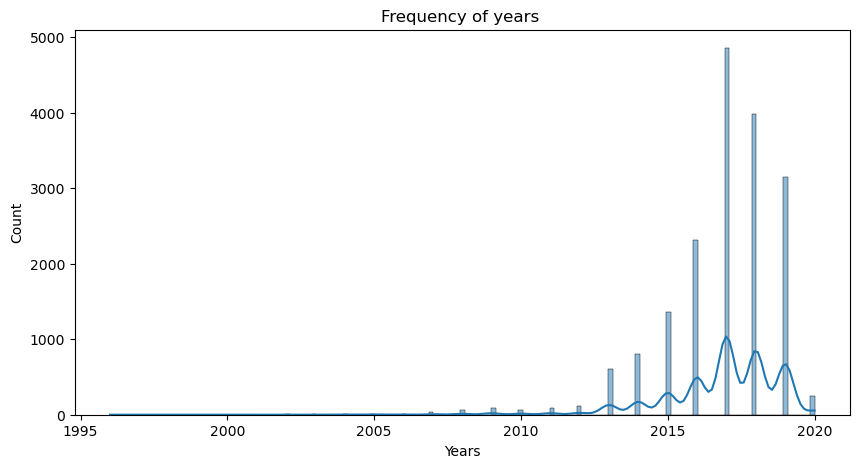

In [12]:
# Visualising the spread of the year column
plt.figure(figsize=(10,5))
sns.histplot(data=df_ford, x='year', kde=True)
plt.title('Frequency of years ')
plt.xlabel('Years')
#plt.savefig('histo_years.jpeg')
plt.show()

In [13]:
# Histogram show very limited data before 2010
# Removing rows of data before 2010
df_ford = df_ford[df_ford['year'] >= 2010]

# Transmission

In [14]:
# Checking for the different values in transmission column and seeing which is most popular
df_ford.transmission.value_counts()

transmission
Manual       15184
Automatic     1331
Semi-Auto     1075
Name: count, dtype: int64

# Mileage

In [15]:
# Checking the stats on the column
df_ford.mileage.describe()

count     17590.000000
mean      22663.122911
std       18180.760424
min           1.000000
25%        9952.500000
50%       18002.000000
75%       30546.250000
max      151000.000000
Name: mileage, dtype: float64

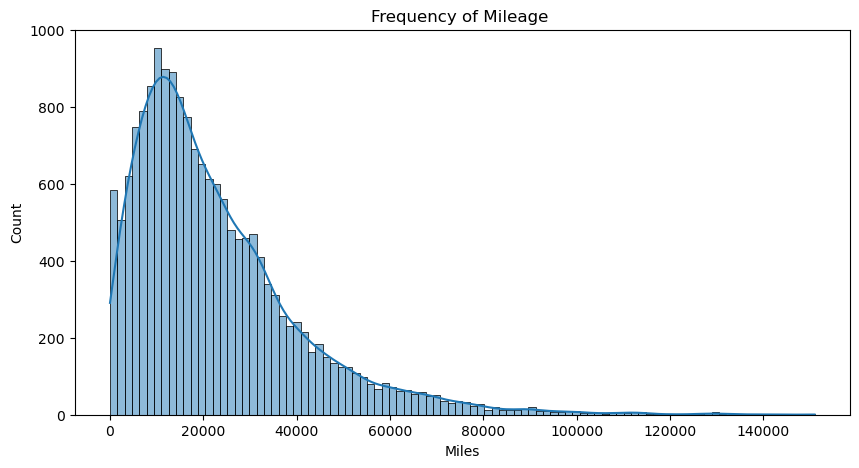

In [16]:
# Visualising the spread of mileage column
plt.figure(figsize=(10,5))
sns.histplot(data=df_ford, x='mileage', kde=True)
plt.title('Frequency of Mileage ')
plt.xlabel('Miles')
#plt.savefig('histo_mileage.jpeg')
plt.show()

In [17]:
# Calculating the mean and std for mileage
mean_mileage = df_ford.mileage.mean()
std_mileage = df_ford.mileage.std()
# Creating a new column with the amount of stds each point is from the mean to find biggest outliers
df_ford['mileage_zscore'] = (df_ford.mileage - mean_mileage) / std_mileage

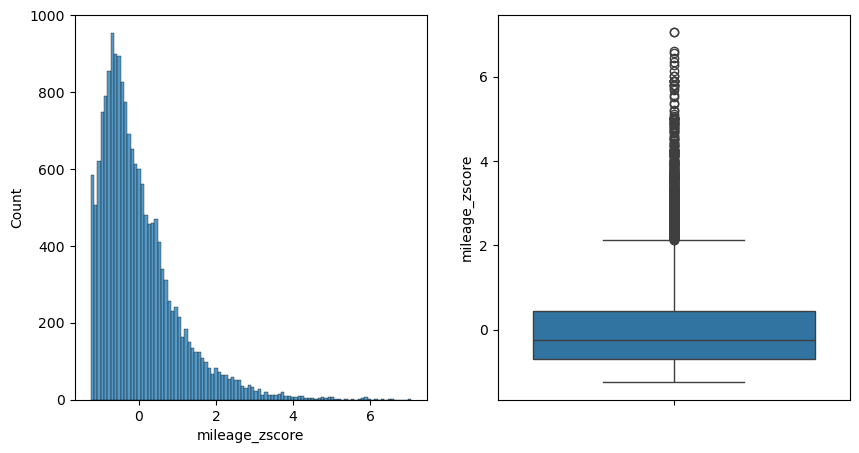

In [18]:
# Visualising the distribution of mileage zscore
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df_ford.mileage_zscore)
plt.subplot(1,2,2)
sns.boxplot(df_ford.mileage_zscore)
plt.show()

In [19]:
# Any row of data that is more than 3 stds away from the mean mileage is removed
df_ford = df_ford[df_ford['mileage_zscore'] <= 3]

In [20]:
# Removing the mileage zscore column
df_ford = df_ford.drop(columns=['mileage_zscore'])

# Fuel Type

In [21]:
# Checking the uniques values of fueltype and their corrosponding counts
df_ford.fuelType.value_counts()

fuelType
Petrol      11847
Diesel       5439
Hybrid         20
Electric        2
Other           1
Name: count, dtype: int64

In [22]:
# Very little data for hybrid, electric and other. Will remove those rows
df_ford = df_ford[df_ford['fuelType'] != 'Hybrid'] 
df_ford = df_ford[df_ford['fuelType'] != 'Electric'] 
df_ford = df_ford[df_ford['fuelType'] != 'Other'] 

# Tax

In [23]:
# Checking the stats on the column
df_ford.tax.describe()
# Some cars have a tax of 0 meaning they were not on the road in the previous year

count    17286.000000
mean       112.933125
std         60.933049
min          0.000000
25%         30.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64

In [24]:
# Finding all rows with tax of 0
zero_tax = df_ford[df_ford['tax'] == 0]
zero_tax.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
12,Fiesta,2017,11000,Manual,20978,Petrol,0,65.7,1.0
24,Fiesta,2014,6795,Manual,35299,Petrol,0,65.7,1.0
27,Fiesta,2015,8299,Manual,25935,Petrol,0,65.7,1.0
30,Fiesta,2016,7999,Manual,60730,Diesel,0,78.5,1.5
33,Fiesta,2013,7236,Manual,39090,Petrol,0,65.7,1.0


In [25]:
# Checking what car models are included in the zero tax df
zero_tax.model.value_counts()

model
Fiesta    1512
Focus      484
Mondeo      46
B-MAX       39
Name: count, dtype: int64

In [26]:
# Replacing the zero values with np.nan so they are not included when calculating the mean
df_ford.tax = df_ford.tax.replace(0, np.nan)

In [27]:
# Calculating the mean tax per model
mean_tax_per_model = df_ford.groupby('model')['tax'].transform('mean')

In [28]:
# Filling in the nan values with the mean for it's model
df_ford.tax = df_ford.tax.fillna(mean_tax_per_model)

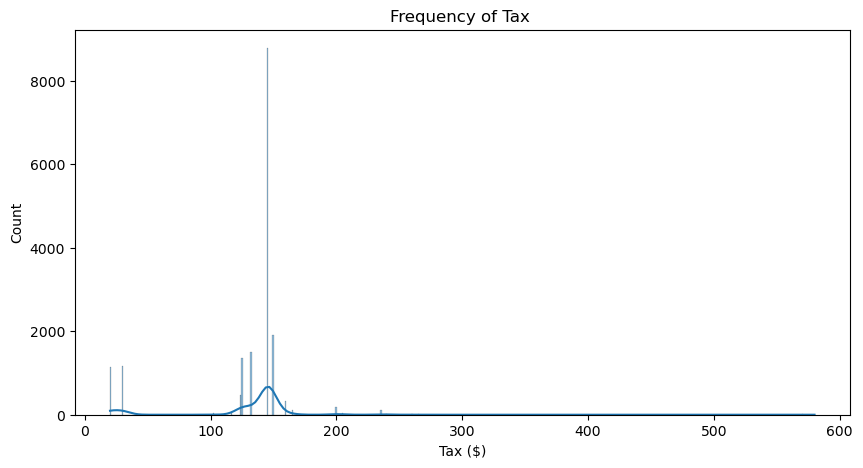

In [29]:
# Visualising the spread of the tax column
plt.figure(figsize=(10,5))
sns.histplot(data=df_ford, x='tax', kde=True)
plt.title('Frequency of Tax ')
plt.xlabel('Tax ($)')
#plt.savefig('histo_tax.jpeg')
plt.show()

In [30]:
# Calculating the mean and std for the tax column
mean_tax = df_ford.tax.mean()
std_tax = df_ford.tax.std()

# Creating a new column with how many stds each rows is form the tax mean
df_ford['tax_zscore'] = (df_ford.tax - mean_tax) / std_tax

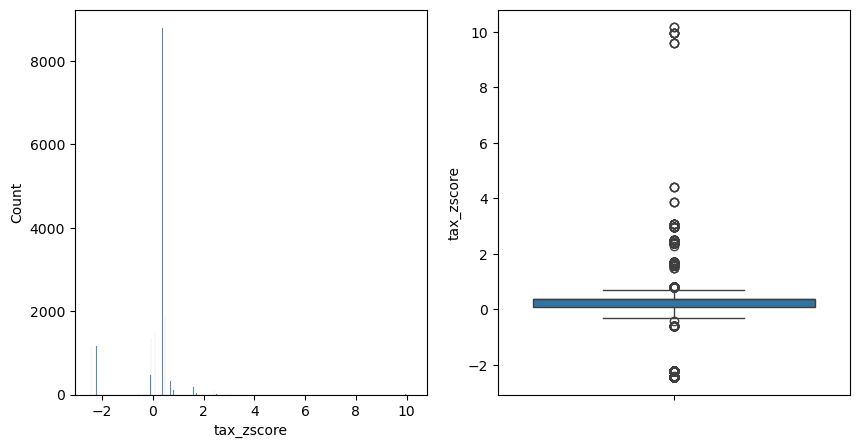

In [31]:
# Visualising the distribution of tax zscore
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df_ford.tax_zscore)
plt.subplot(1,2,2)
sns.boxplot(df_ford.tax_zscore)
plt.show()

In [32]:
# Removing any row of data that is more than 3 stds away from the tax mean
df_ford = df_ford[df_ford['tax_zscore'] <= 3]

In [33]:
# Removing the tax zscore column
df_ford = df_ford.drop(columns=['tax_zscore'])

# MPG

In [34]:
# Checking the stats on the column
df_ford.mpg.describe()

count    17261.000000
mean        58.027270
std          9.693845
min         20.800000
25%         53.300000
50%         58.900000
75%         65.700000
max         88.300000
Name: mpg, dtype: float64

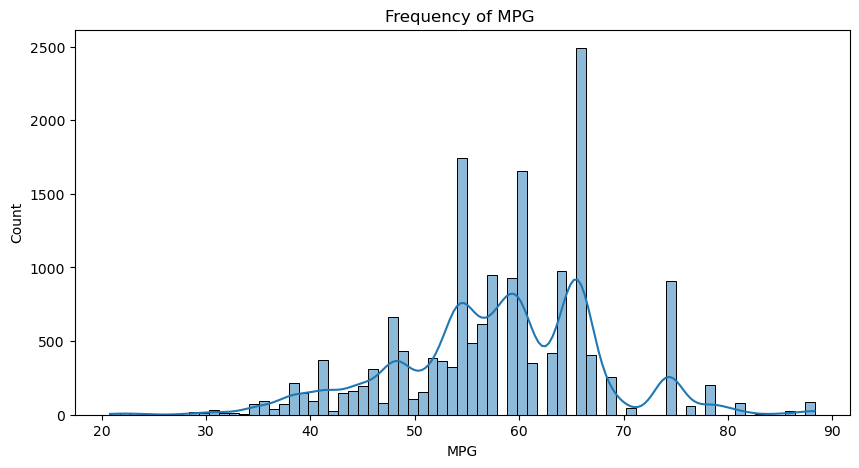

In [35]:
# Visualising the spread of mpg column
plt.figure(figsize=(10,5))
sns.histplot(data=df_ford, x='mpg', kde=True)
plt.title('Frequency of MPG ')
plt.xlabel('MPG')
#plt.savefig('histo_mpg.jpeg')
plt.show()

# Engine Size

In [36]:
# Checking the stats on the column
df_ford.engineSize.describe()

count    17261.000000
mean         1.338474
std          0.423737
min          0.000000
25%          1.000000
50%          1.200000
75%          1.500000
max          5.000000
Name: engineSize, dtype: float64

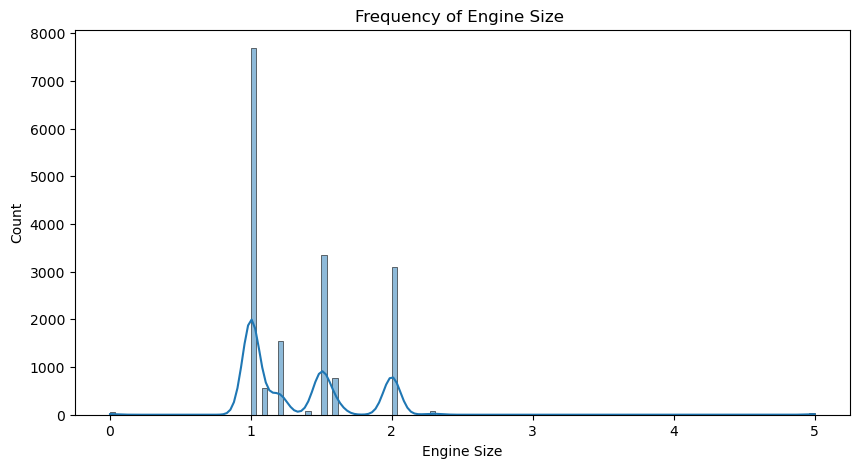

In [37]:
# Visualising the spread of engine size
plt.figure(figsize=(10,5))
sns.histplot(data=df_ford, x='engineSize', kde=True)
plt.title('Frequency of Engine Size ')
plt.xlabel('Engine Size')
#plt.savefig('histo_enginesize.jpeg')
plt.show()

In [38]:
# Checking the value counts for engine size
df_ford.engineSize.value_counts()

engineSize
1.0    7689
1.5    3354
2.0    3103
1.2    1553
1.6     770
1.1     550
2.3      76
1.4      71
0.0      49
5.0      37
2.2       6
1.3       2
1.8       1
Name: count, dtype: int64

In [39]:
# Removing any rows that have an engine size of 0
df_ford = df_ford[df_ford['engineSize'] > 0]
# Removing any rows that have a engine size of 5
df_ford = df_ford[df_ford['engineSize'] < 5]

# Price

In [40]:
# Checkign the stats on the column
df_ford.price.describe()

count    17175.000000
mean     12416.070684
std       4434.667143
min       2395.000000
25%       9279.000000
50%      11489.000000
75%      15395.000000
max      54995.000000
Name: price, dtype: float64

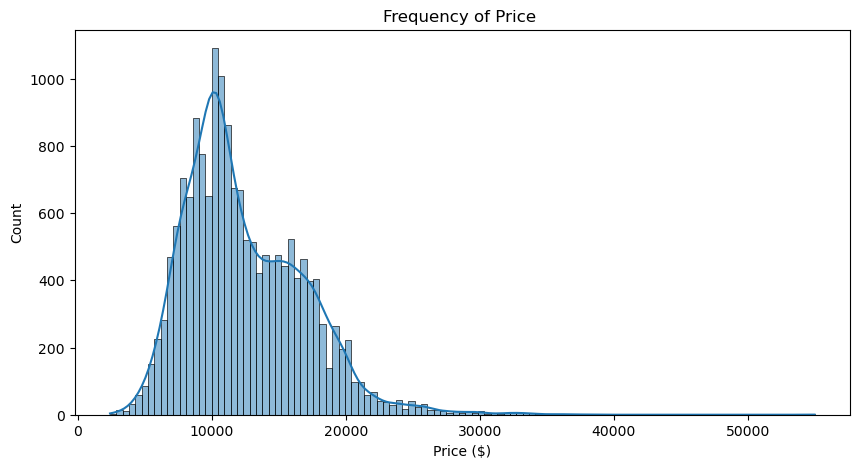

In [41]:
# Visualising the spread of the price column
plt.figure(figsize=(10,5))
sns.histplot(data=df_ford, x='price', kde=True)
plt.title('Frequency of Price ')
plt.xlabel('Price ($)')
#plt.savefig('histo_price.jpeg')
plt.show()

In [42]:
# Calculating the mean and std for the price column
mean_price = df_ford.price.mean()
std_price = df_ford.price.std()

# Cretaing a new column with how many stds each row is from the mean price
df_ford['price_zscore'] = (df_ford.price - mean_price) / std_price

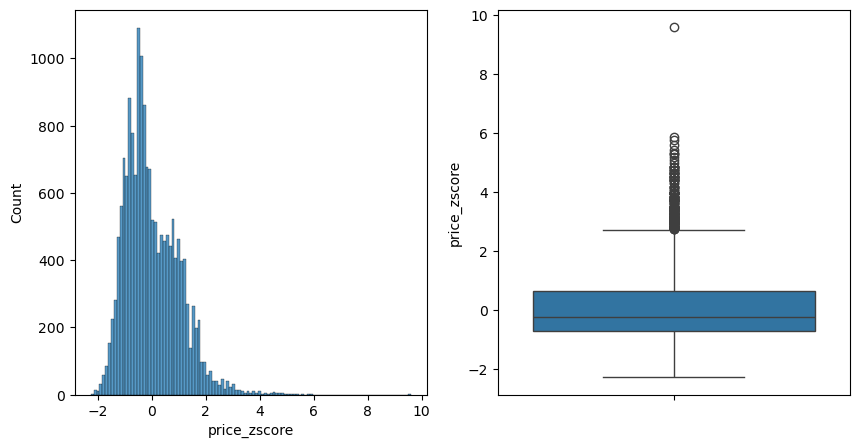

In [43]:
# Visualising the distribution of price zscore
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df_ford.price_zscore)
plt.subplot(1,2,2)
sns.boxplot(df_ford.price_zscore)
plt.show()

In [44]:
# Removing any rows that are more than 3 stds away from the mean price
df_ford = df_ford[df_ford['price_zscore'] <= 3]

In [45]:
# Removing the price zscore column
df_ford = df_ford.drop(columns=['price_zscore'])

In [46]:
df_ford.to_csv('updated_cleaned_ford_df.txt')